### Introduction
This notebook shows how using Differential Privacy together with SGX helps to avoid accurate Membership Inference Attacks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
sgs = pd.DataFrame()
for i in glob.iglob('../results/SGX/sg*'):
    print(i)
    curr = pd.read_csv(i)
    norm, noise = curr['max_norm'][0], curr['noise_multiplier'][0]
    name = 'norm={},noise={}'.format(norm, noise)
    if norm == 1 and noise == 1:
        name = 'no dp'
    curr['name'] = name
    sgs = pd.concat([sgs, curr])
sgs.describe()

../results/SGX/sg-10-5.csv
../results/SGX/sg-3-15.csv
../results/SGX/sg-10-3.csv
../results/SGX/sg-nodp.csv


iter         loss     accuracy  convergence_score  \
count  2000.000000  2000.000000  2000.000000        2000.000000   
mean    250.500000     1.311026     0.546487           1.772608   
std     144.373376     0.731096     0.082502           1.026970   
min       1.000000     0.000570     0.099950           0.008449   
25%     125.750000     1.287500     0.491780           1.654263   
50%     250.500000     1.556015     0.567287           2.416263   
75%     375.250000     1.947570     0.595339           2.757912   
max     500.000000     2.302396     0.638894           3.087819   

                time      epsilon   best_alpha  auc_attack_before  \
count    2000.000000  1500.000000  1500.000000        2000.000000   
mean   168879.232412     7.511490     5.868867           0.607156   
std    104893.608304     6.075116     5.349297           0.136206   
min       553.268791     0.101268     2.100000           0.512017   
25%     80042.272504     2.336825     2.800000           0.526394   
50%    158762.371042     6.134577     3.850000           0.536632   
75%    255138.285407    10.754984     7.300000           0.563010   
max    373667.051482    22.482928    63.000000           0.937732   

       auc_attack_after     max_norm  noise_multiplier  
count       2000.000000  2000.000000       2000.000000  
mean           0.607170     6.000000          6.000000  
std            0.136773     4.063035          5.386512  
min            0.511731     1.000000          1.000000  
25%            0.526741     2.500000          2.500000  
50%            0.537093     6.500000          4.000000  
75%            0.563020    10.000000          7.500000  
max            0.942044    10.000000         15.000000

In [4]:
def plot(df, x = 'iter', y = 'accuracy', logy = False, logx = False, 
         title = '', agg = 'name', sh_var = 'max_norm', legtitle = '',
         xlim = [0, 500], scatter = False, linewidth = 4):
    df = df.copy()
    df['iter'] = df['iter']*4
    plt.figure(figsize = (6, 6))
    for name in sorted(np.unique(df[agg])):
        curr = df[df[agg] == name]
        if scatter:
            plt.scatter(curr[x], curr[y], label = name, alpha = 0.5)
        else:
            plt.plot(curr[x], curr[y], label = name, alpha = 0.5, linewidth = linewidth)
    if logy:
        plt.yscale('log')
    if logx:
        plt.xscale('log')
    #plt.ylim(ylim)
    plt.xlim(xlim)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title = legtitle)
    plt.show()

### Accuracy
Using Differential Privacy makes the models converge slower than the version with no DP. But the accuracies in the end are similar, although the one without DP is slightly better.

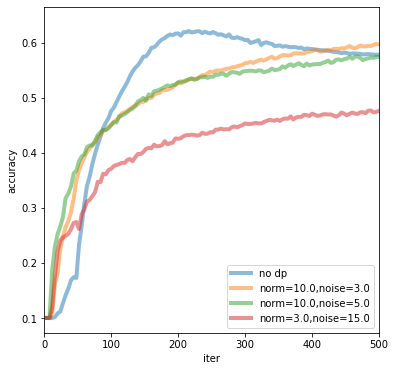

In [5]:
plot(sgs)

### Accuracy with regards to $\epsilon$
The no DP version is not shown here because this plot shows accuracy by privacy and the no DP version does not have any privacy guarantees. This plot shows how depending on the privacy budget, different parameters for DP have to be chosen.

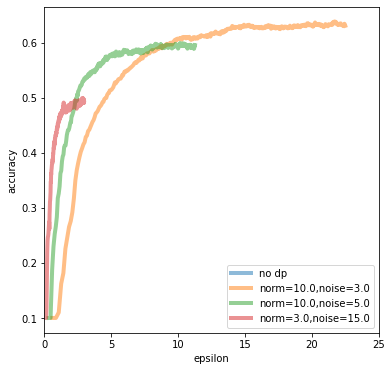

In [6]:
plot(sgs, x = 'epsilon', xlim = [0, 25])

### Privacy
This plot shows the bad performance of using only aggregation in regards to MIAs. The attacks against the no DP version are much more effective.

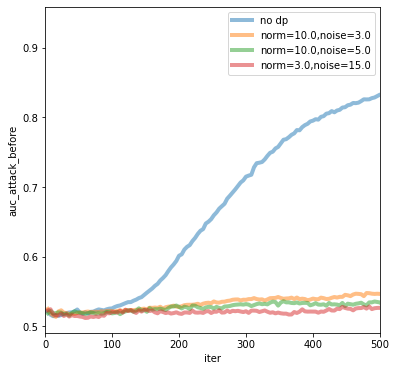

In [7]:
plot(sgs, y = 'auc_attack_before')

### Privacy with regards to $\epsilon$
The greater the epsilon, the more effective the attacks and vice versa, as it is expected.

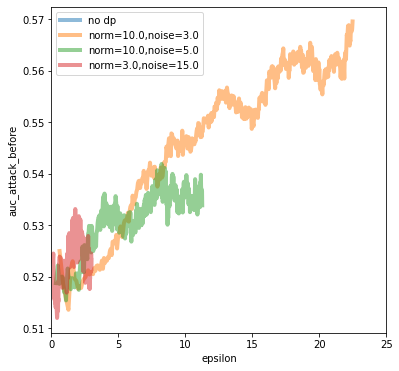

In [8]:
plot(sgs, y = 'auc_attack_before', x = 'epsilon', xlim = [0, 25])

### Conclusion
Using aggregation as a method to lower the effectiveness of MIAs does not seem to work. On the other side, different values of parameters for DP-SGD give different results and show a trade off between accuracy and convergence speed and privacy.